In [85]:
# Ignorar os avisos
import warnings
warnings.filterwarnings('always')  # Configurar para mostrar todos os avisos
warnings.filterwarnings('ignore')  # Ignorar os avisos

# Visualização e manipulação de dados 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
from scipy.stats import ttest_ind
from sklearn.datasets import fetch_openml  # Adicionada
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
# Configuração
style.use('fivethirtyeight')  # Estilo de plotagem
sns.set(style='whitegrid', color_codes=True)  # Configurações de estilo para Seaborn

# Importar algoritmos de modelagem necessários.

# Classificação.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Regressão
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Seleção de modelo
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Pré-processamento
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer  # Importar o SimpleImputer do módulo sklearn.impute

# Métricas de avaliação
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error  # para regressão
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # para classificação

#Curva ROC
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score


In [3]:
df=pd.read_csv('analise_vinho_tinto.csv')

In [4]:
df = df.iloc[:, 1:]

In [5]:
df.shape

(1599, 12)

In [6]:
df.columns 

Index(['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloreto', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            1599 non-null   float64
 1   acidez_volatil         1599 non-null   float64
 2   acido_citrico          1599 non-null   float64
 3   acucar_residual        1599 non-null   float64
 4   cloreto                1599 non-null   float64
 5   dioxido_enxofre_livre  1599 non-null   float64
 6   dioxido_enxofre_total  1599 non-null   float64
 7   densidade              1599 non-null   float64
 8   pH                     1599 non-null   float64
 9   sulfatos               1599 non-null   float64
 10  alcool                 1599 non-null   float64
 11  qualidade              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloreto                  0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
pH                       0
sulfatos                 0
alcool                   0
qualidade                0
dtype: int64

## Análise de Correlação das Características da Qualidade do Vinho

Através da aplicação das técnicas de correlação de Pearson e Spearman, podemos discernir as características que mais influenciam a qualidade do vinho. Os resultados indicam que as variáveis de álcool e densidade apresentam as maiores correlações. A análise de Spearman ainda revela o cloreto como uma variável com significativa correlação, enquanto a análise de Pearson destaca a acidez volátil. É fundamental notar, no entanto, que nenhuma dessas correlações ultrapassa o limiar de 0,5, sugerindo uma relação moderada entre as características e a qualidade do vinho.

Explorando as características de menor correlação, observamos que, em ambos os conjuntos de dados, o açúcar residual exibe a menor correlação. Além disso, na análise de Spearman, os sulfatos demonstram uma correlação fraca, enquanto na análise de Pearson, o pH é a variável com a correlação mais baixa.

Essas descobertas fornecem insights valiosos sobre os fatores que afetam a qualidade do vinho, informando futuras investigações e aprimorando nossa compreensão das relações entre as características químicas e organolépticas dessa bebida apreciada.

<Axes: >

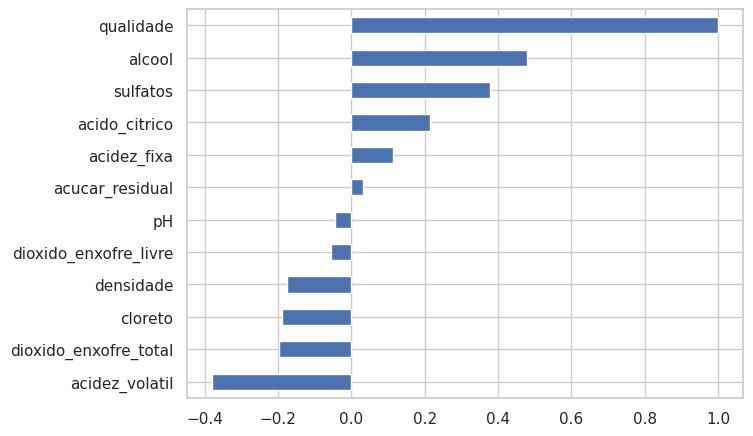

In [8]:
df.corr(method = "spearman", numeric_only = True)['qualidade'].sort_values().plot(kind = 'barh')

<Axes: >

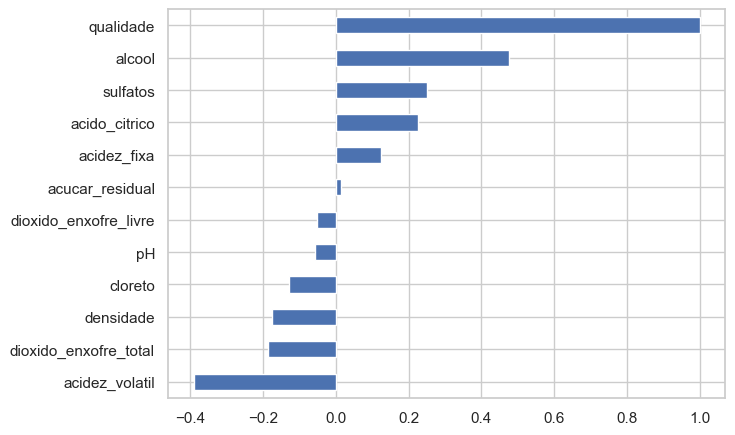

In [9]:
df.corr(method = "pearson", numeric_only = True)['qualidade'].sort_values().plot(kind = 'barh')

<Axes: xlabel='qualidade', ylabel='alcool'>

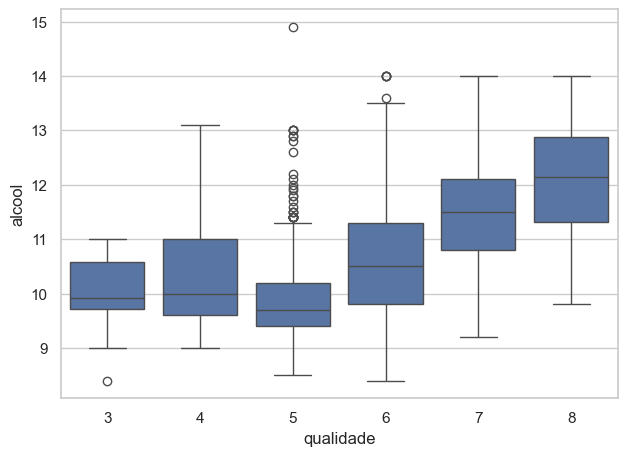

In [10]:
sns.boxplot(data = df,
           x = "qualidade",
           y = "alcool")

# Análise univariada

In [11]:
df.describe(include='all')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloreto,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Análise de Relação entre Notas e Teor Alcoólico de Vinhos

Nesta análise, investigamos a relação entre a pontuação de vinhos e seu teor alcoólico. Os resultados revelam uma tendência notável: vinhos com classificação superior (9) tendem a apresentar teores alcoólicos mais elevados. No entanto, é crucial observar que a presença de um alto teor alcoólico não é, por si só, um indicativo infalível de qualidade, visto que identificamos casos atípicos de vinhos com uma pontuação de 5 que exibem elevado teor alcoólico.


<Axes: xlabel='alcool', ylabel='Density'>

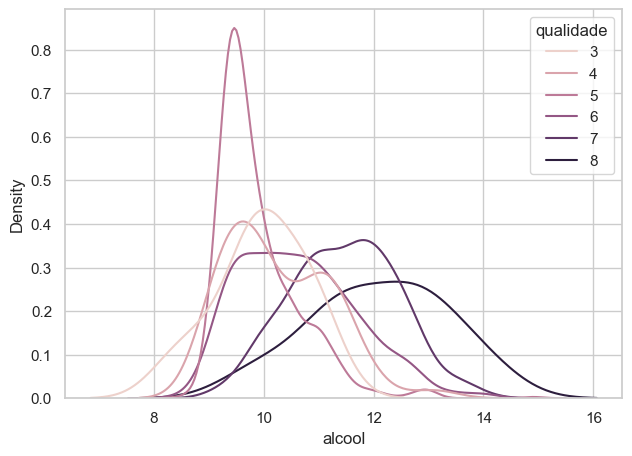

In [12]:
sns.kdeplot(data = df,
           x = "alcool",
           hue = "qualidade",
           common_norm = False)

# Análise das Relações entre Classificação de Vinhos e Teor Alcoólico

Neste estudo, exploramos as relações entre a classificação de vinhos e seu teor alcoólico com base em dados empíricos. O gráfico apresentado acima ilustra as conclusões extraídas dessa análise.

## Resultados da Análise

O gráfico confirma de forma convincente a existência de uma correlação entre a classificação dos vinhos e seu teor alcoólico. Em particular, destacamos as seguintes descobertas:

- Vinhos com classificações mais elevadas, variando entre 7 e 9, exibem um teor alcoólico superior. Isso é evidenciado pela presença de um pico notável na densidade de amostras de vinho, concentrado entre 11 e 13 graus de álcool.

- Por outro lado, os vinhos com classificações mais baixas apresentam uma densidade de amostras mais significativa em uma faixa de graduação alcoólica entre 9 e 10.

Esses resultados sugerem que o teor alcoólico pode ser um fator relevante na classificação de vinhos, com vinhos mais alcoólicos geralmente recebendo classificações mais altas. Essa associação entre classificação e teor alcoólico pode ser de interesse para produtores, apreciadores e entusiastas de vinho que desejam compreender melhor os fatores subjacentes à apreciação de vinhos.

É importante notar que essa análise se baseia em dados disponíveis e pode não capturar todas as nuances do mundo dos vinhos. No entanto, os resultados aqui apresentados oferecem uma visão valiosa das relações entre classificação de vinhos e teor alcoólico, proporcionando um ponto de partida para investigações mais aprofundadas e tomada de decisões informadas.


### Os historiogramas são úteis para entender a distribuição de dados, identificar tendências, padrões e outliers em um conjunto de dados. 

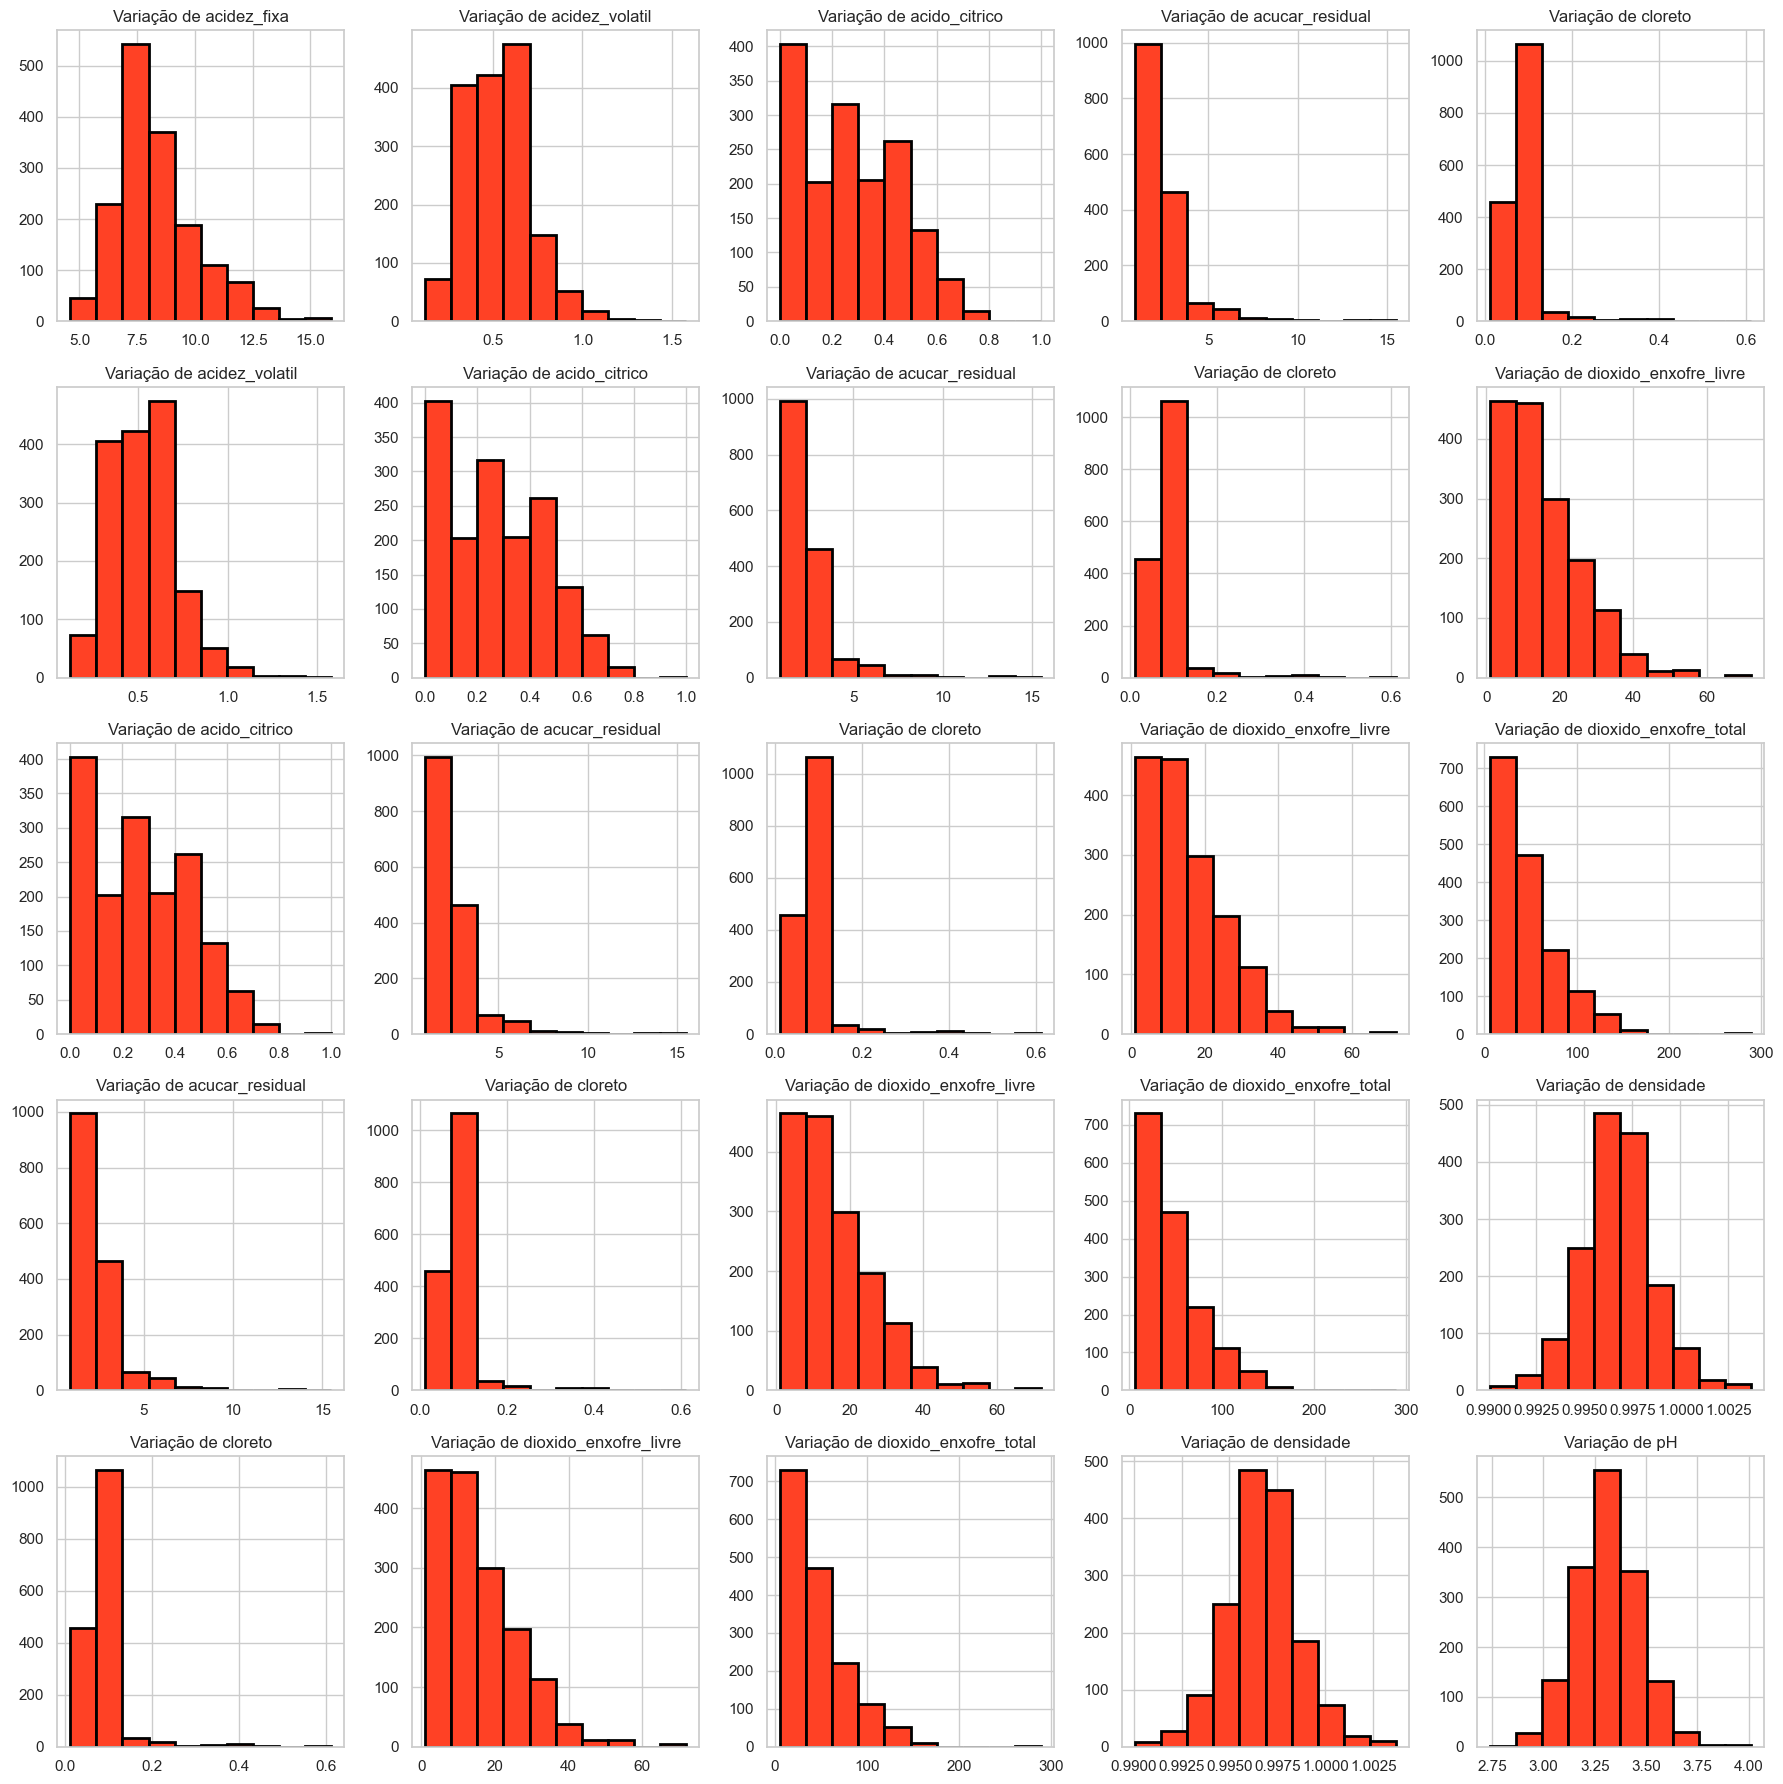

In [13]:
fig, axes = plt.subplots(5, 5)
colunas = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
           'cloreto', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
           'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade']
for i in range(5):
    for j in range(5):
        axes[i, j].hist(x=colunas[i + j], data=df,
                        edgecolor='#000000', linewidth=2, color='#ff4125')
        axes[i, j].set_title('Variação de ' + colunas[i + j])
fig = plt.gcf()
fig.set_size_inches(18, 18)
fig.tight_layout()


### Correlação entre diferentes características usando um mapa de correlação

<Axes: >

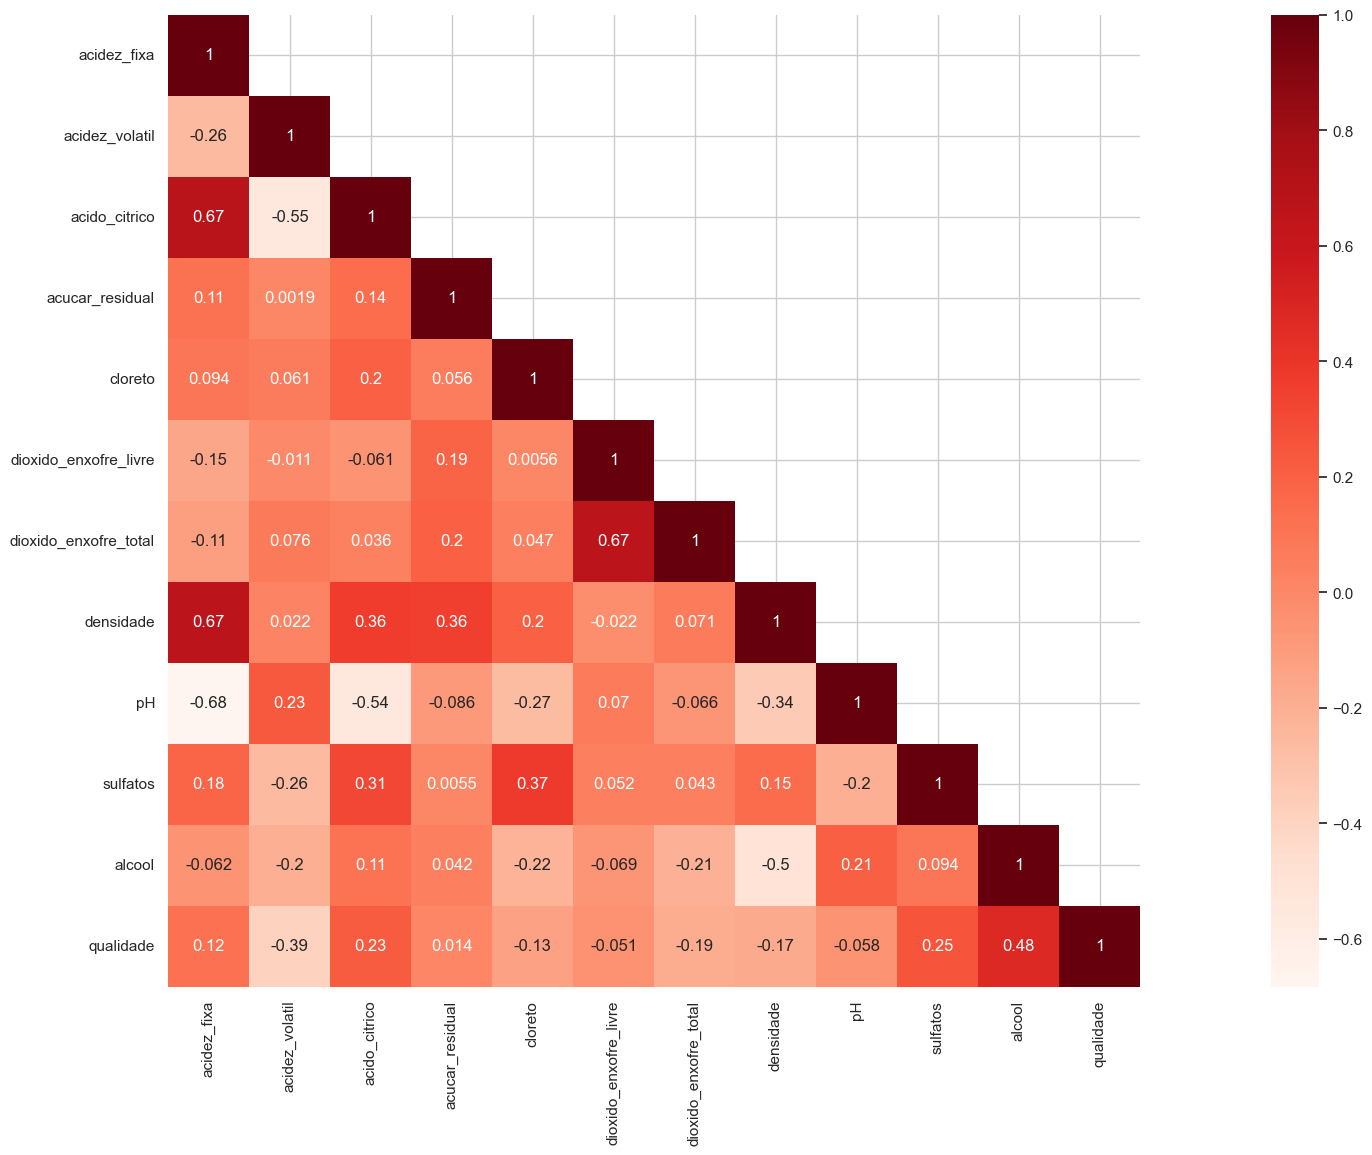

In [14]:
matriz_correlacao = df.corr()
mascara = np.array(matriz_correlacao)
mascara[np.tril_indices_from(mascara)] = False
figura = plt.gcf()
figura.set_size_inches(30, 12)

# Usar a paleta de cores "Reds" para criar um degradê de tons de vermelho
sns.heatmap(data=matriz_correlacao, mask=mascara, square=True, annot=True, cbar=True, cmap="Reds")


**INFERÊNCIAS DO MAPA DE CALOR ACIMA:**

1. A qualidade do vinho está altamente relacionada à acidez volátil.

2. Além disso, a qualidade do vinho está altamente correlacionada com o teor alcoólico.

3. O pH e o ácido cítrico/ acidez fixa estão altamente inversamente relacionados, pois todos sabemos que os ácidos têm valores de pH menores.

4. A relação consigo mesma (ou seja, de uma característica consigo mesma) é igual a 1, como esperado.

5. Outras inferências semelhantes podem ser feitas.

### Agora é possível visualizar a variação da qualidade em relação a distintos atributos numéricos.

#### A função cria e exibe três gráficos em uma única chamada, usando os parâmetros fornecidos. É útil quando desejar visualizar diferentes aspectos da relação entre duas variáveis em um conjunto de dados.

In [15]:
def plot(feature_x, target='qualidade'):
    sns.catplot(x=target, y=feature_x, data=df, kind='bar', height=5, aspect=1)
    sns.catplot(x=target, y=feature_x, data=df, kind='violin', height=5, aspect=1)
    sns.catplot(x=target, y=feature_x, data=df, kind='swarm', height=5, aspect=1)

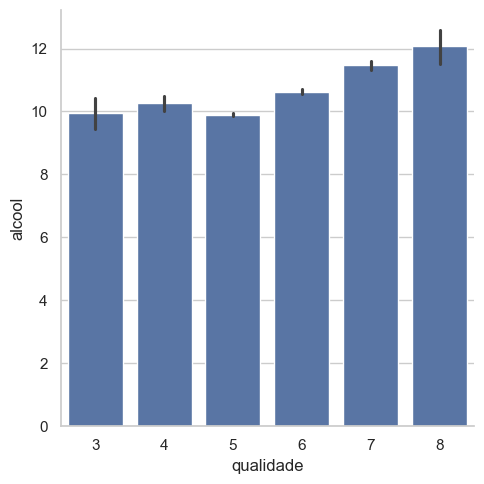

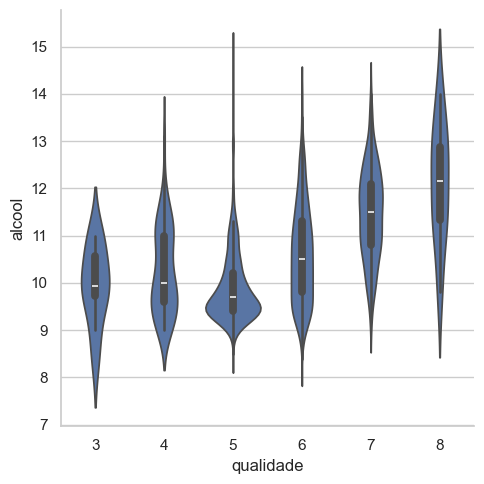

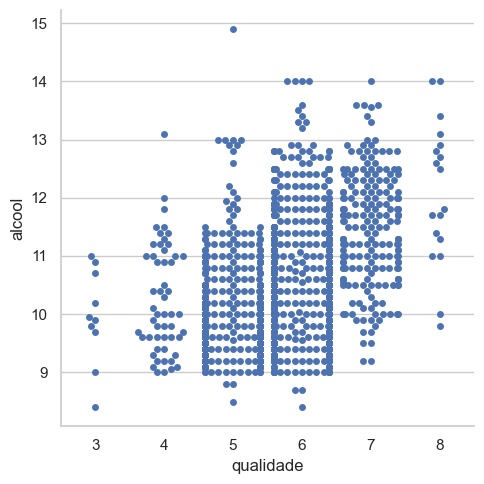

In [16]:
plot('alcool','qualidade')

## Preparação Concluída: Avançando para a Modelagem de Dados

In [17]:
intervalos = (2, 6.5, 8)
nomes_grupos = ['ruim', 'bom']
df['qualidade'] = pd.cut(df['qualidade'], bins=intervalos, labels=nomes_grupos)

In [18]:
# Cria uma instância do LabelEncoder
codificador_rotulos = LabelEncoder()

##### Uma explicação sucinta sobre o LabelEncoder: Esta classe, parte da biblioteca scikit-learn (sklearn), é amplamente empregada para converter rótulos (categorias) em variáveis categóricas em valores numéricos. Essa conversão é essencial ao treinar modelos de aprendizado de máquina que exigem entradas numéricas em vez de categóricas. Por exemplo, permite transformar rótulos de classes, como "ruim" e "bom", em valores 0 e 1, tornando-os adequados como entradas para modelos de machine learning.

In [19]:
# "Ruim" se torna 0 e "Bom" se torna 1
df['qualidade'] = codificador_rotulos.fit_transform(df['qualidade'])


**Divisão de Dados para Treinamento e Teste:**

Este código divide um conjunto de dados em duas partes: uma para treinar um modelo de machine learning (conjunto de treinamento) e outra para testar o modelo (conjunto de teste). Ele separa as características do conjunto de destino (rótulos) e permite avaliar o desempenho do modelo ao usar dados que não foram usados no treinamento.

In [20]:
x_treino, x_teste, y_treino, y_teste = train_test_split(
    df.drop('qualidade', axis=1), df['qualidade'], test_size=0.25, random_state=42)


## Comparação de Modelos de Classificação e Cálculo da Acurácia

In [21]:
# Lista de modelos de classificação
modelos = [KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]


nomes_dos_modelos = ['KNearestNeighbors','RandomForestClassifier','DecisionTree']

acuracias = []  # Lista para armazenar as acurácias dos modelos
resultados = {}  # Dicionário para armazenar os resultados

for i, modelo in enumerate(modelos):
    clf = modelo  # clf é uma abreviação comum para "classificador"
    clf.fit(x_treino, y_treino)  # Treina o classificador com os dados de treinamento
    previsoes = clf.predict(x_teste)  # Faz previsões com o conjunto de teste
    acuracia = accuracy_score(previsoes, y_teste)  # Calcula a acurácia das previsões
    acuracias.append(acuracia)  # Adiciona a acurácia à lista de acurácias

# Preenche o dicionário de resultados com os nomes dos modelos e suas acurácias correspondentes
resultados['Algoritmo de Modelagem'] = nomes_dos_modelos
resultados['Acurácia'] = acuracias

resultados  # Retorna o dicionário de resultados

{'Algoritmo de Modelagem': ['KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree'],
 'Acurácia': [0.8625, 0.9075, 0.885]}

In [22]:
acuracias_frame = pd.DataFrame(resultados)
acuracias_frame

,Algoritmo de Modelagem,Acurácia
0,KNearestNeighbors,0.8625
1,RandomForestClassifier,0.9075
2,DecisionTree,0.8850


<Axes: xlabel='Acurácia', ylabel='Algoritmo de Modelagem'>

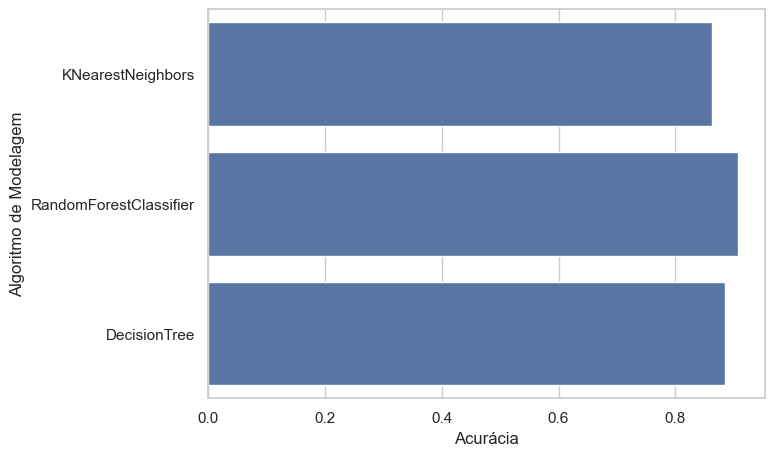

In [23]:
sns.barplot(y='Algoritmo de Modelagem',x='Acurácia',data=acuracias_frame)

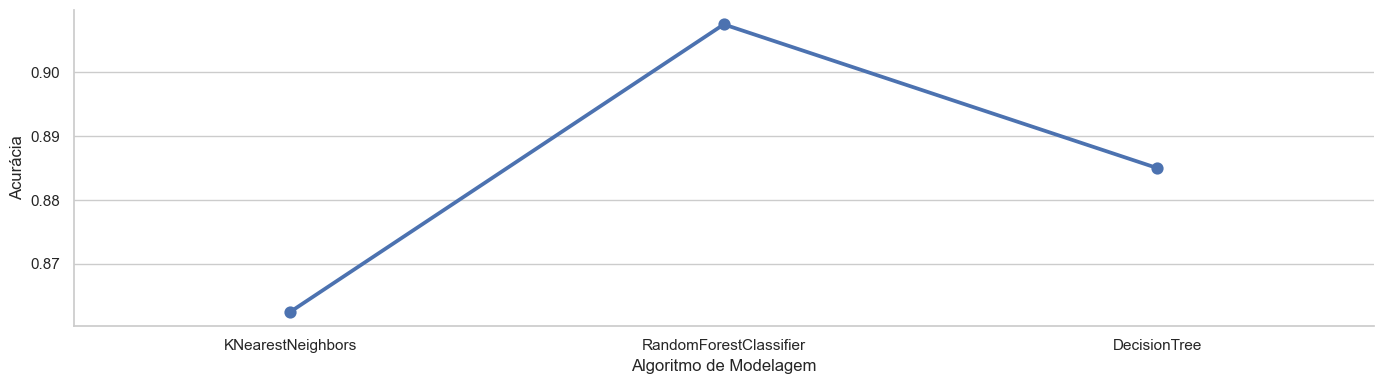

In [24]:
sns.catplot(x='Algoritmo de Modelagem',y='Acurácia',data=acuracias_frame, kind='point', height=4, aspect=3.5)

No contexto da análise de dados, é importante notar que, inicialmente, as características não foram submetidas a nenhum tipo de escala. Isso significa que essas características têm diferentes escalas, o que implica que seus valores estão em intervalos ou unidades distintas. Agora, com o objetivo de entender melhor o impacto disso, a próxima etapa é realizar a escala das características. O escalonamento de características é uma prática comum em ciência de dados, utilizada para padronizar as características em uma escala uniforme. Essa ação visa avaliar como essa padronização afeta os resultados e o desempenho do modelo ou da análise em questão.

In [28]:
def avaliar_modelos(x_treino, x_teste, y_treino, y_teste, nome_escalonador):
    # Lista de modelos a serem avaliados
# Lista de modelos de classificação
    modelos = [KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]
           
    resultados_acuracia = []

    # Avaliar cada modelo
    for modelo in modelos:
        clf = modelo
        clf.fit(x_treino, y_treino)
        previsoes = clf.predict(x_teste)
        resultados_acuracia.append(accuracy_score(previsoes, y_teste))

    # Armazenar os resultados no dataframe
    acuracias_frame[nome_escalonador] = np.array(resultados_acuracia)


In [29]:
df.shape

(1599, 12)

In [30]:
# Extrair o array de labels 'qualidade' do DataFrame
Y = df['qualidade'].to_numpy()

# Lista de escaladores a serem aplicados aos dados
escaladores = [MinMaxScaler(), StandardScaler()]

# Nomes descritivos para os resultados dos escaladores
nomes_escalonadores = ['Acuracia_Min_Max_Scaler', 'Acuracia_Standard_Scaler']

# Iterar através dos escaladores e avaliar os modelos
for escala in range(len(escaladores)):
    escalador = escaladores[escala]

    # Aplicar o escalador aos dados
    escalador.fit(df)
    df_escalado = escalador.transform(df)

    # Selecionar as características escaladas 
    X = df_escalado[:,0:6]

    # Reatribuir Y com os rótulos de 'qualidade'
    Y = df['qualidade'].to_numpy()

    # Dividir os dados em treino e teste
    x_treino, x_teste, y_treino, y_teste = train_test_split(
        X, Y, test_size=0.25, random_state=42)

    # Avaliar os modelos com o nome do escalador correspondente
    avaliar_modelos(x_treino, x_teste, y_treino, y_teste, nomes_escalonadores[escala])


## Técnicas de Escalonamento no Desempenho de Modelos de Classificação

O código tem o objetivo de avaliar como diferentes técnicas de escalonamento afetam o desempenho de modelos de classificação em um conjunto de dados específico. Utilizando a função `avaliar_modelos`, o código examina vários modelos de classificação em dados de treinamento e teste, fornecendo resultados que permitem a comparação do desempenho desses modelos após a aplicação de técnicas de escalonamento, como Min-Max Scaling e Standard Scaling. Esse processo é fundamental para determinar qual abordagem de pré-processamento de dados é mais eficaz na otimização do desempenho dos modelos, desempenhando um papel crucial no desenvolvimento de soluções de machine learning de sucesso.

In [31]:
acuracias_frame

,Algoritmo de Modelagem,Acurácia,Acuracia_Min_Max_Scaler,Acuracia_Standard_Scaler
0,KNearestNeighbors,0.8625,0.8725,0.8725
1,RandomForestClassifier,0.9075,0.9125,0.8775
2,DecisionTree,0.8850,0.8325,0.8275


Neste momento, apresenta-se de forma clara as precisões de diferentes algoritmos de modelagem ao utilizar diferentes escaladores.

1. É importante notar que, neste contexto, as precisões aumentam marginalmente ao realizar o escalonamento.

2. Adicionalmente, para esses dados, o StandardScaling parece proporcionar resultados ligeiramente superiores em comparação com o MinMaxScaling.

3. Para alguns algoritmos de modelagem, observa-se um aumento significativo nas precisões ao escalonar as características, como SVM e KNN, enquanto, para outros, não se observa um aumento considerável nas precisões ao realizar o escalonamento.

<Axes: xlabel='Acurácia', ylabel='Algoritmo de Modelagem'>

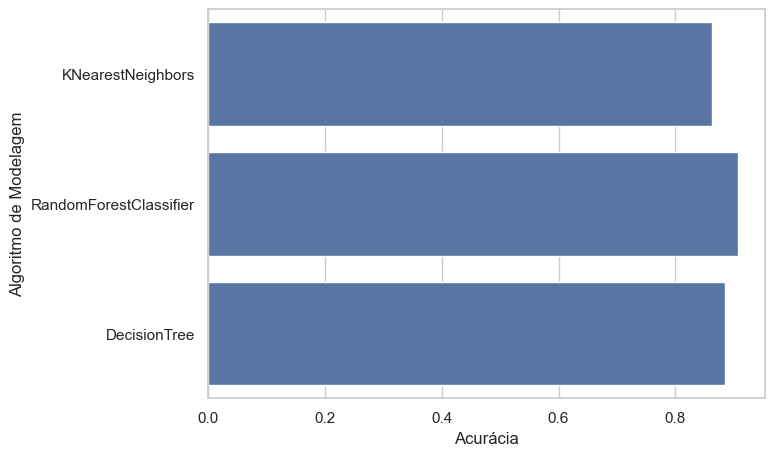

In [32]:
# código cria um gráfico de barras que ajuda a comparar a precisão de vários algoritmos de modelagem

sns.barplot(y='Algoritmo de Modelagem',x='Acurácia',data=acuracias_frame)

<Axes: xlabel='Acuracia_Min_Max_Scaler', ylabel='Algoritmo de Modelagem'>

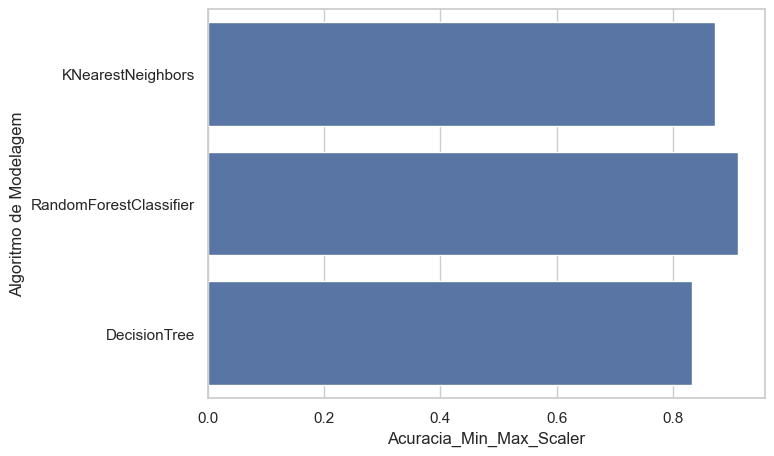

In [33]:
sns.barplot(y='Algoritmo de Modelagem',x='Acuracia_Min_Max_Scaler',data=acuracias_frame)

<Axes: xlabel='Acuracia_Standard_Scaler', ylabel='Algoritmo de Modelagem'>

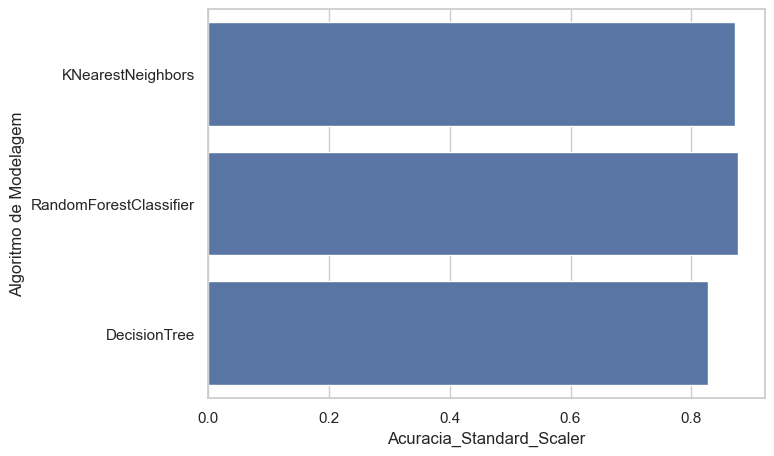

In [34]:
sns.barplot(y='Algoritmo de Modelagem',x='Acuracia_Standard_Scaler',data=acuracias_frame)

In [35]:
# Extrai a coluna 'qualidade' como o alvo (variável de saída) Y e converte-a em um array NumPy.
Y = df['qualidade'].to_numpy()

# Prepara as features (variáveis de entrada) utilizando um StandardScaler para padronização dos dados, uma vez que isso produziu resultados melhores no passado.
escalador = StandardScaler()
df_escalado = escalador.fit_transform(df)
X = df_escalado[:, 0:11]  # Seleciona as colunas de 0 a 10 como as features padronizadas.

# Reatribui Y para garantir que estamos usando a variável alvo correta.
Y = df['qualidade'].to_numpy()

# Divide os dados em conjuntos de treinamento e teste usando a função train_test_split.
# 75% dos dados serão usados para treinamento (x_treino, y_treino) e 25% para teste (x_teste, y_teste).
# O valor de random_state é definido como 42 para garantir a reprodutibilidade dos resultados.
x_treino, x_teste, y_treino, y_teste, = train_test_split(X, Y, test_size=0.25, random_state=42)


## Ajuste de parâmetros

######   1. KNN.

In [37]:
# Cria uma lista de valores para o número de vizinhos
lista_vizinhos = [i + 1 for i in range(100)]

# Define um dicionário de parâmetros para o KNeighborsClassifier
parametros_knn = {'n_neighbors': lista_vizinhos, 'weights': ['uniform', 'distance']} # 'n_jobs': [-1]


# Cria um classificador KNeighborsClassifier com busca em grade

classificador_knn_acc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn, scoring='accuracy', cv=10)

classificador_knn_bacc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn, scoring='balanced_accuracy', cv=10)

classificador_knn_avp = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn, scoring='average_precision', cv=10)

classificador_knn_roc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn, scoring='roc_auc', cv=10)


# Treina o classificador com os dados de treinamento
classificador_knn_acc.fit(x_treino,y_treino)

classificador_knn_bacc.fit(x_treino,y_treino)

classificador_knn_avp.fit(x_treino,y_treino)

classificador_knn_roc.fit(x_treino,y_treino)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [39]:
print(f'KNN - Accuracy: Best Params: {classificador_knn_acc.best_params_}  e Best Score: {classificador_knn_acc.best_score_}')

print(f'KNN - Balanced Accuracy: Best Params: {classificador_knn_bacc.best_params_}  e Best Score: {classificador_knn_bacc.best_score_}')

print(f'KNN - average precision: Best Params: {classificador_knn_avp.best_params_}  e Best Score: {classificador_knn_avp.best_score_}')

print(f'KNN - ROC : Best Params: {classificador_knn_roc.best_params_}  e Best Score: {classificador_knn_roc.best_score_}')


KNN - Accuracy: Best Params: {'n_neighbors': 66, 'weights': 'distance'}  e Best Score: 0.9099579831932774
KNN - Balanced Accuracy: Best Params: {'n_neighbors': 2, 'weights': 'uniform'}  e Best Score: 0.7749232581382068
KNN - average precision: Best Params: {'n_neighbors': 95, 'weights': 'distance'}  e Best Score: 0.9854716154945147
KNN - ROC : Best Params: {'n_neighbors': 85, 'weights': 'distance'}  e Best Score: 0.9191748945657426


In [82]:
# Faz previsões com o modelo otimizado nos dados de teste.
previsoes_acc = classificador_knn_acc.predict(x_teste)
previsoes_bacc = classificador_knn_bacc.predict(x_teste)
previsoes_avp = classificador_knn_avp.predict(x_teste)
previsoes_roc = classificador_knn_roc.predict(x_teste)

previsoes_acc_treino = classificador_knn_acc.predict(x_treino)
previsoes_bacc_treino = classificador_knn_bacc.predict(x_treino)
previsoes_avp_treino = classificador_knn_avp.predict(x_treino)
previsoes_roc_treino = classificador_knn_roc.predict(x_treino)

# Calcula a acurácia das previsões comparando com os valores reais nos dados de teste.

print(f'KNN - Accuracy: Accuracy Score: {accuracy_score(previsoes_acc, y_teste)}  e Accuracy Score TREINO: {accuracy_score(previsoes_acc_treino, y_treino)}')

print(f'KNN - Balanced Accuracy: Accuracy Score: {accuracy_score(previsoes_bacc, y_teste)} e Balanced Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_bacc_treino, y_treino)}')

print(f'KNN - average precision: Accuracy Score: {accuracy_score(previsoes_avp, y_teste)}  e average precision: Accuracy Score TREINO: {accuracy_score(previsoes_avp_treino, y_treino)}')

print(f'KNN - ROC : Accuracy Score: {accuracy_score(previsoes_roc, y_teste)} e ROC : Accuracy Score TREINO: {accuracy_score(previsoes_roc_treino, y_treino)}')


KNN - Accuracy: Accuracy Score: 0.9075  e Accuracy Score TREINO: 1.0
KNN - Balanced Accuracy: Accuracy Score: 0.8325 e Balanced Accuracy: Accuracy Score TREINO: 0.9407839866555463
KNN - average precision: Accuracy Score: 0.91  e average precision: Accuracy Score TREINO: 1.0
KNN - ROC : Accuracy Score: 0.91 e ROC : Accuracy Score TREINO: 1.0


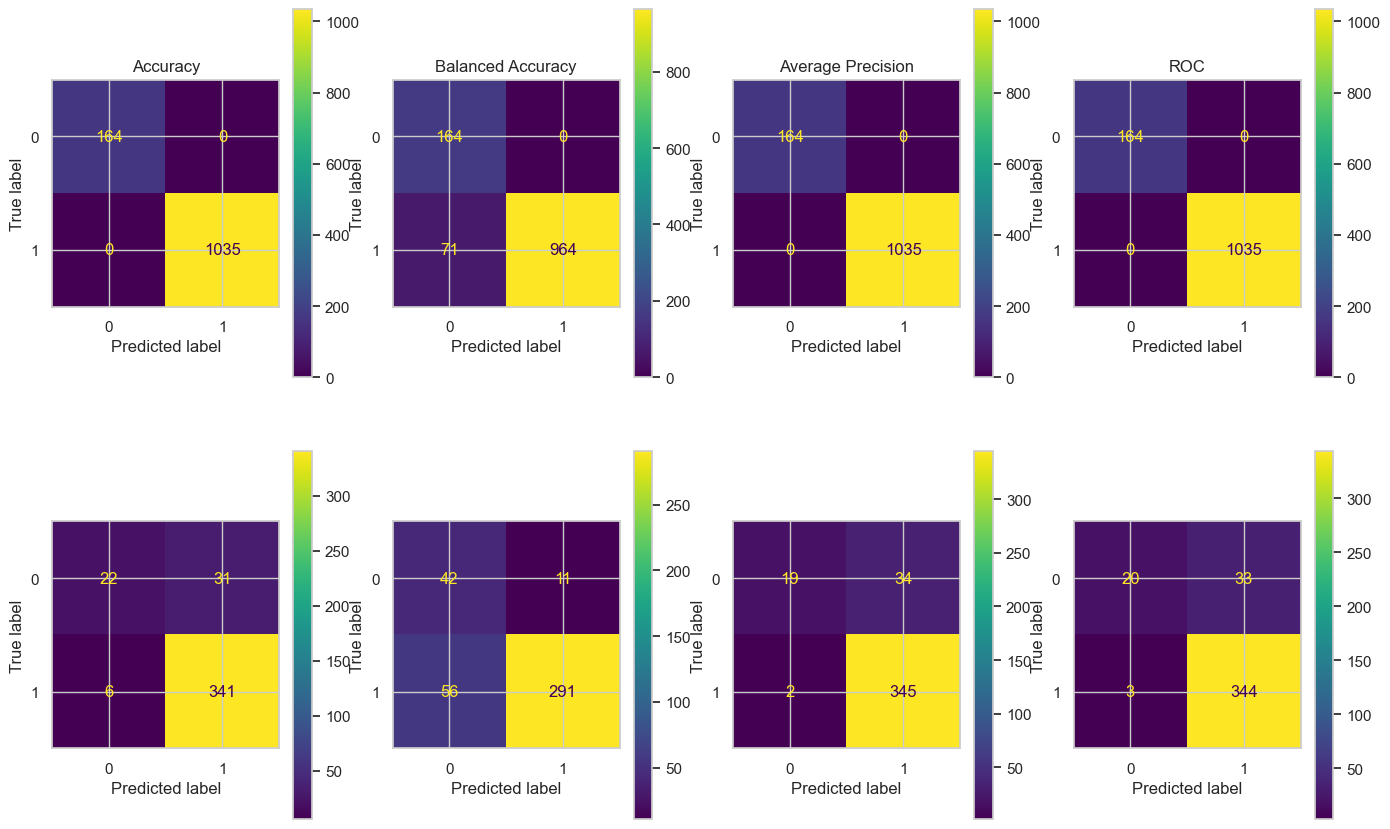

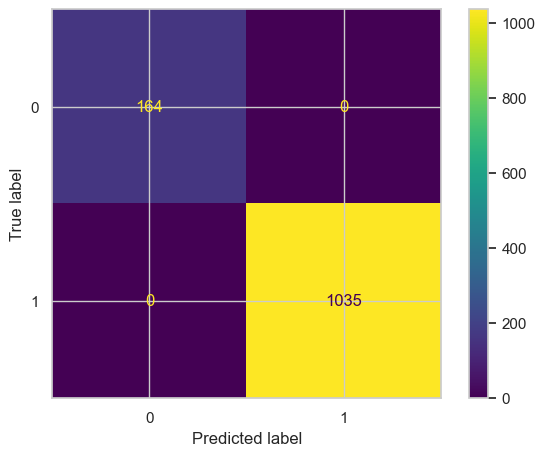

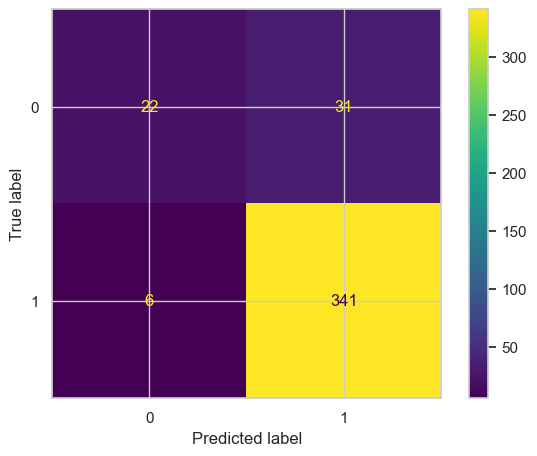

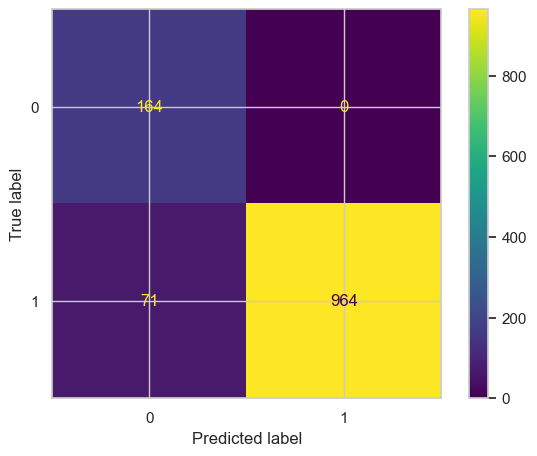

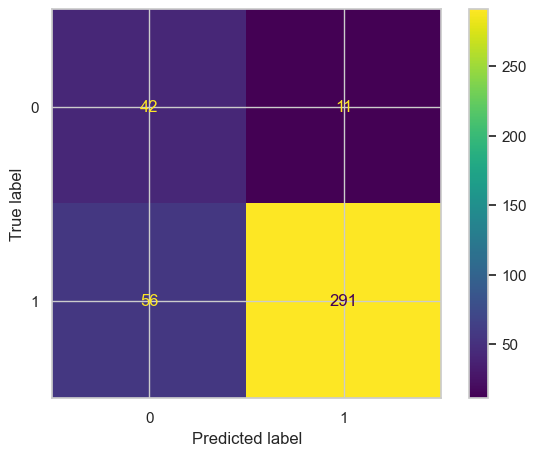

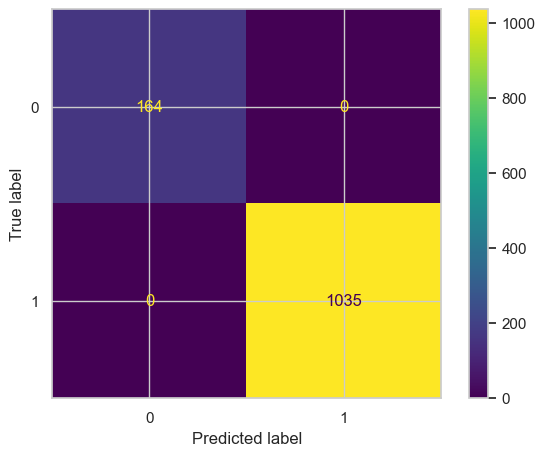

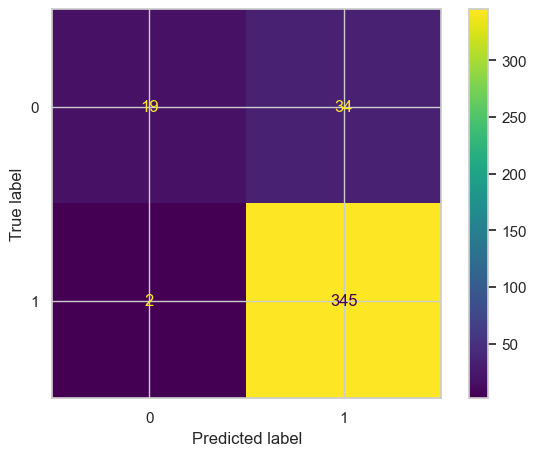

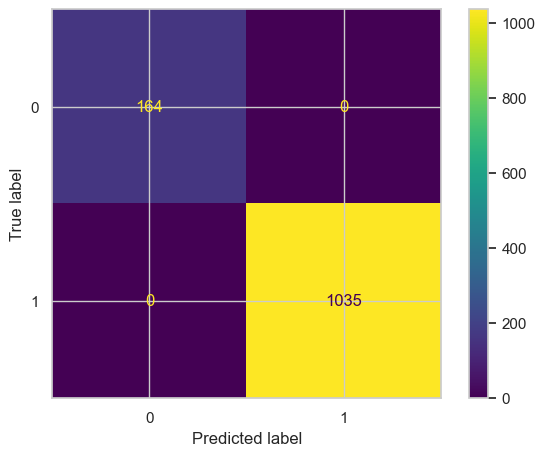

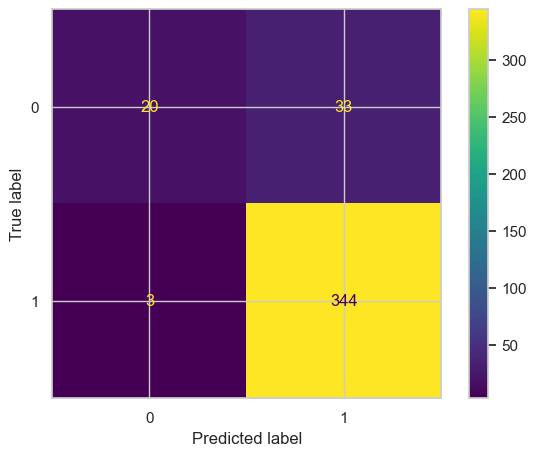

In [66]:
#Fazer plotar apenas o subplot, não os individuais.

fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

axs[0,0].set_title("KNN - Accuracy")
axs[0,1].set_title("KNN - Balanced Accuracy")
axs[0,2].set_title("KNN - Average Precision")
axs[0,3].set_title("KNN - ROC")

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_acc_treino).plot(ax = axs[0,0])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_acc).plot(ax = axs[1,0])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_bacc_treino).plot(ax = axs[0,1])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_bacc).plot(ax = axs[1,1])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_avp_treino).plot(ax = axs[0,2])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_avp).plot(ax = axs[1,2])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_roc_treino).plot(ax = axs[0,3])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_roc).plot(ax = axs[1,3])
plt.show()


######   2. Decision Tree.

In [73]:
# Definição dos parâmetros para o Random Forest
parametros_dt = {'max_depth':range(1,8)}  # Método de seleção de características

# Criação do classificador Random Forest com Grid Search
classificador_dt_acc = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=parametros_dt,  # Parâmetros a serem ajustados
                                scoring='accuracy',  # Métrica de avaliação
                                cv=10)  # Validação cruzada com 10 folds

classificador_dt_bacc = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=parametros_dt,  
                                scoring='balanced_accuracy',  
                                cv=10)  

classificador_dt_avp = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=parametros_dt, 
                                scoring='average_precision',  
                                cv=10)  

classificador_dt_roc = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=parametros_dt,  
                                scoring='roc_auc',  
                                cv=10)  #

# Treinamento do classificador Random Forest
classificador_dt_acc.fit(x_treino, y_treino)  # Dados de treinamento
classificador_dt_bacc.fit(x_treino, y_treino)  # Dados de treinamento
classificador_dt_avp.fit(x_treino, y_treino)  # Dados de treinamento
classificador_dt_roc.fit(x_treino, y_treino)  # Dados de treinamento


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 8)}, scoring='roc_auc')

In [80]:
print(f'DT - Accuracy: Best Params: {classificador_dt_acc.best_params_}  e Best Score: {classificador_dt_acc.best_score_}')

print(f'DT - Balanced Accuracy: Best Params: {classificador_dt_bacc.best_params_}  e Best Score: {classificador_dt_bacc.best_score_}')

print(f'DT - average precision: Best Params: {classificador_dt_avp.best_params_}  e Best Score: {classificador_dt_avp.best_score_}')

print(f'DT - ROC : Best Params: {classificador_dt_roc.best_params_}  e Best Score: {classificador_dt_roc.best_score_}')


DT - Accuracy: Best Params: {'max_depth': 3}  e Best Score: 0.8866036414565827
DT - Balanced Accuracy: Best Params: {'max_depth': 7}  e Best Score: 0.7095320531125071
DT - average precision: Best Params: {'max_depth': 4}  e Best Score: 0.955254352750349
DT - ROC : Best Params: {'max_depth': 4}  e Best Score: 0.8243296413038703


In [81]:
# Faz previsões com o modelo otimizado nos dados de teste.
previsoes_dt_acc = classificador_dt_acc.predict(x_teste)
previsoes_dt_bacc = classificador_dt_bacc.predict(x_teste)
previsoes_dt_avp = classificador_dt_avp.predict(x_teste)
previsoes_dt_roc = classificador_dt_roc.predict(x_teste)

previsoes_dt_acc_treino = classificador_dt_acc.predict(x_treino)
previsoes_dt_bacc_treino = classificador_dt_bacc.predict(x_treino)
previsoes_dt_avp_treino = classificador_dt_avp.predict(x_treino)
previsoes_dt_roc_treino = classificador_dt_roc.predict(x_treino)

# Calcula a acurácia das previsões comparando com os valores reais nos dados de teste.

print(f'DT - Accuracy: Accuracy Score TESTE: {accuracy_score(previsoes_dt_acc, y_teste)}   e  Accuracy Score Treino: {accuracy_score(previsoes_dt_acc_treino, y_treino)}')

print(f'DT - Balanced Accuracy: Accuracy Score: {accuracy_score(previsoes_dt_bacc, y_teste)} e Balanced Accuracy: Accuracy Score: {accuracy_score(previsoes_dt_bacc_treino, y_treino)}')

print(f'DT - Average Precision: Accuracy Score: {accuracy_score(previsoes_dt_avp, y_teste)}  e Average Precision: Accuracy Score: {accuracy_score(previsoes_dt_avp_treino, y_treino)}')

print(f'DT - ROC : Accuracy Score: {accuracy_score(previsoes_dt_roc, y_teste)} e ROC : Accuracy Score: {accuracy_score(previsoes_dt_roc_treino, y_treino)}')


DT - Accuracy: Accuracy Score TESTE: 0.8825   e  Accuracy Score Treino: 0.902418682235196
DT - Balanced Accuracy: Accuracy Score: 0.87 e Balanced Accuracy: Accuracy Score: 0.9482902418682235
DT - Average Precision: Accuracy Score: 0.88  e Average Precision: Accuracy Score: 0.9165971643035863
DT - ROC : Accuracy Score: 0.88 e ROC : Accuracy Score: 0.9165971643035863


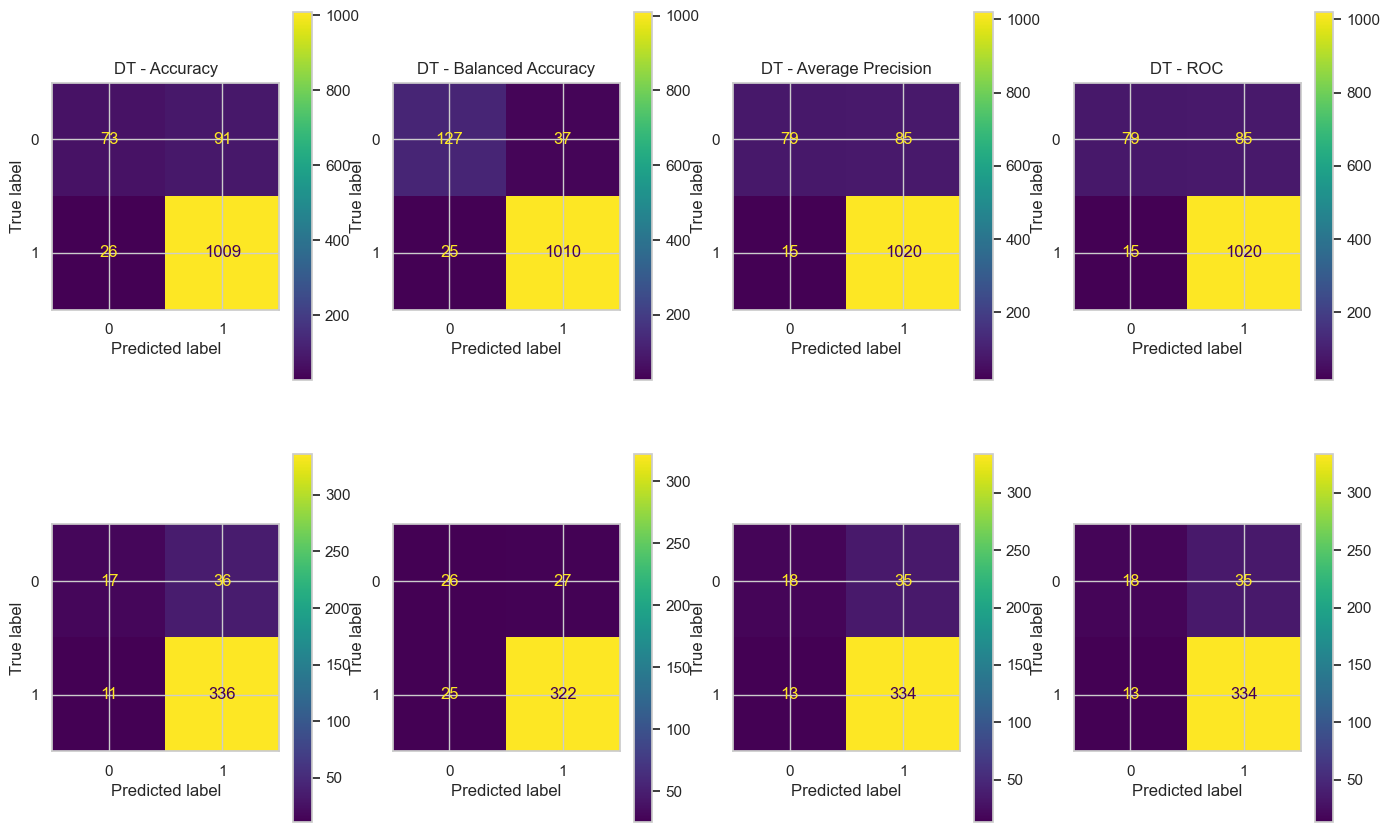

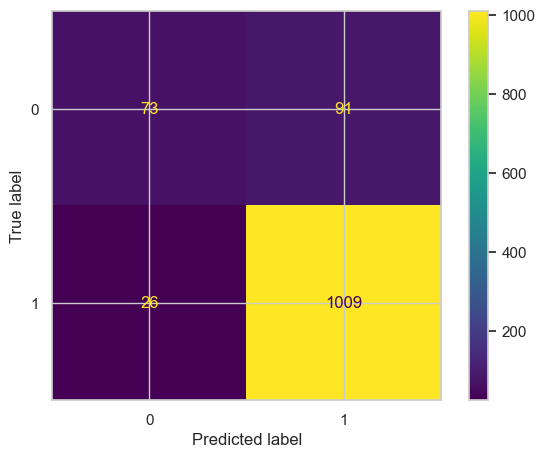

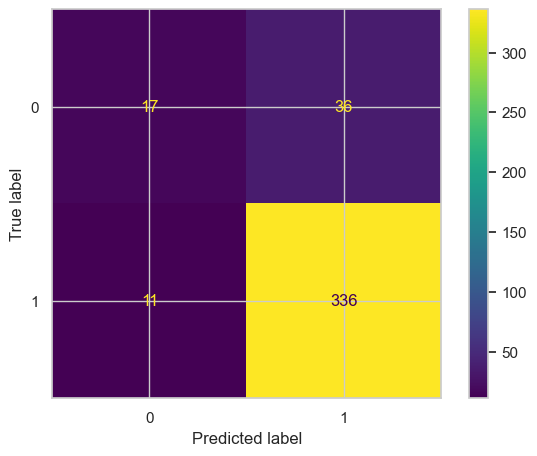

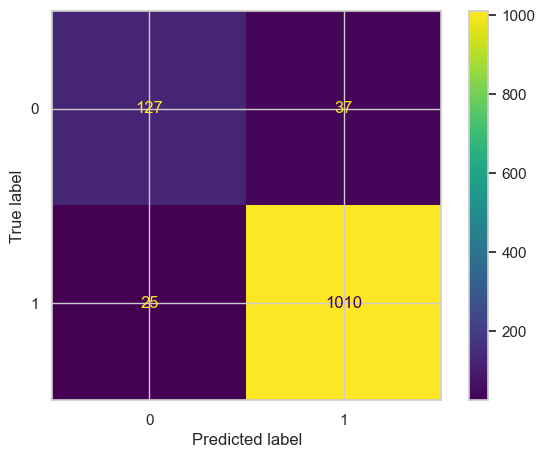

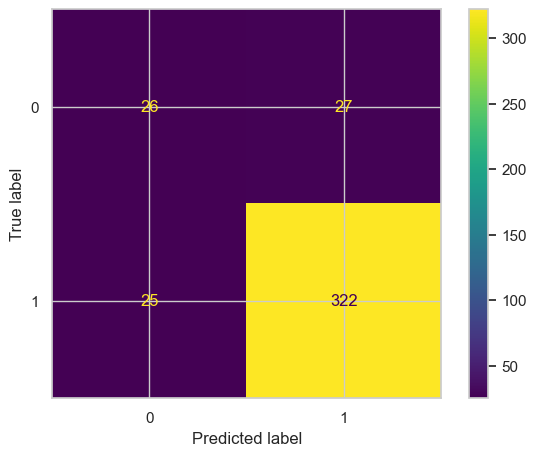

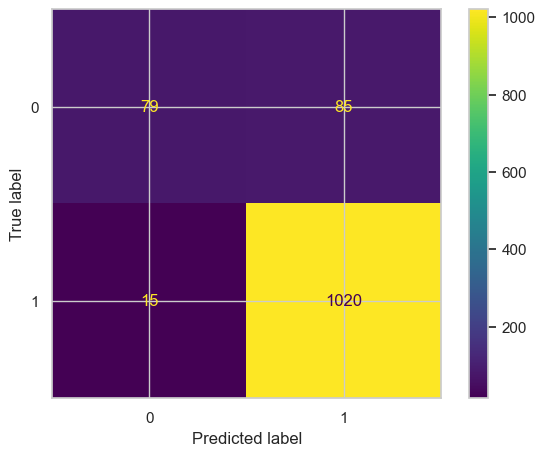

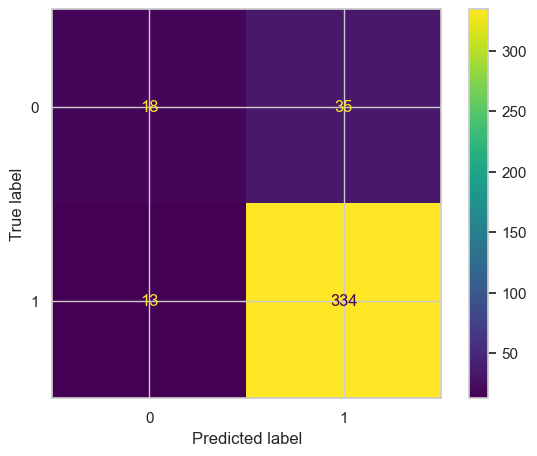

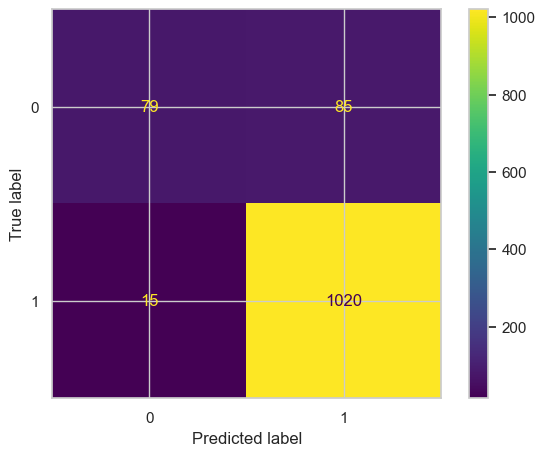

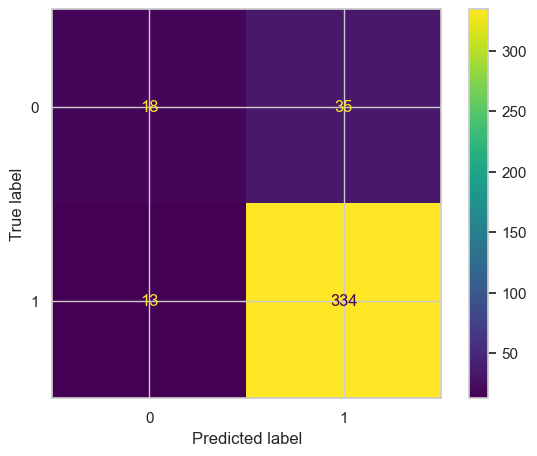

In [77]:
#Fazer plotar apenas o subplot, não os individuais.

fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

axs[0,0].set_title("DT - Accuracy")
axs[0,1].set_title("DT - Balanced Accuracy")
axs[0,2].set_title("DT - Average Precision")
axs[0,3].set_title("DT - ROC")

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_acc_treino).plot(ax = axs[0,0])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_acc).plot(ax = axs[1,0])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_bacc_treino).plot(ax = axs[0,1])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_bacc).plot(ax = axs[1,1])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_avp_treino).plot(ax = axs[0,2])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_avp).plot(ax = axs[1,2])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_dt_roc_treino).plot(ax = axs[0,3])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_dt_roc).plot(ax = axs[1,3])
plt.show()

######   3. RANDOM FOREST.

In [67]:
# Definição dos parâmetros para o Random Forest
parametros_rf = {'max_depth':range(1,8)}  # Método de seleção de características

# Criação do classificador Random Forest com Grid Search
classificador_rf_acc = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                param_grid=parametros_rf,  # Parâmetros a serem ajustados
                                scoring='accuracy',  # Métrica de avaliação
                                cv=10)  # Validação cruzada com 10 folds

classificador_rf_bacc = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                param_grid=parametros_rf,  
                                scoring='balanced_accuracy',  
                                cv=10)  

classificador_rf_avp = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                param_grid=parametros_rf, 
                                scoring='average_precision',  
                                cv=10)  

classificador_rf_roc = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                                param_grid=parametros_rf,  
                                scoring='roc_auc',  
                                cv=10)  #

# Treinamento do classificador Random Forest
classificador_rf_acc.fit(x_treino, y_treino)  # Dados de treinamento
classificador_rf_bacc.fit(x_treino, y_treino)  # Dados de treinamento
classificador_rf_avp.fit(x_treino, y_treino)  # Dados de treinamento
classificador_rf_roc.fit(x_treino, y_treino)  # Dados de treinamento



GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': range(1, 8)}, scoring='roc_auc')

In [70]:
print(f'RF - Accuracy: Best Params: {classificador_rf_acc.best_params_}  e Best Score: {classificador_rf_acc.best_score_}')

print(f'RF - Balanced Accuracy: Best Params: {classificador_rf_bacc.best_params_}  e Best Score: {classificador_rf_bacc.best_score_}')

print(f'RF - average precision: Best Params: {classificador_rf_avp.best_params_}  e Best Score: {classificador_rf_avp.best_score_}')

print(f'RF - ROC : Best Params: {classificador_rf_roc.best_params_}  e Best Score: {classificador_rf_roc.best_score_}')


RF - Accuracy: Best Params: {'max_depth': 7}  e Best Score: 0.8957773109243699
RF - Balanced Accuracy: Best Params: {'max_depth': 7}  e Best Score: 0.6906584973421781
RF - average precision: Best Params: {'max_depth': 7}  e Best Score: 0.9809476929540997
RF - ROC : Best Params: {'max_depth': 7}  e Best Score: 0.9053129324451963


In [83]:
# Faz previsões com o modelo otimizado nos dados de teste.
previsoes_rf_acc = classificador_rf_acc.predict(x_teste)
previsoes_rf_bacc = classificador_rf_bacc.predict(x_teste)
previsoes_rf_avp = classificador_rf_avp.predict(x_teste)
previsoes_rf_roc = classificador_rf_roc.predict(x_teste)

previsoes_rf_acc_treino = classificador_rf_acc.predict(x_treino)
previsoes_rf_bacc_treino = classificador_rf_bacc.predict(x_treino)
previsoes_rf_avp_treino = classificador_rf_avp.predict(x_treino)
previsoes_rf_roc_treino = classificador_rf_roc.predict(x_treino)

# Calcula a acurácia das previsões comparando com os valores reais nos dados de teste.

print(f'RF - Accuracy: Accuracy Score: {accuracy_score(previsoes_rf_acc, y_teste)}  e RF - Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_rf_acc_treino, y_treino)}')

print(f'RF - Balanced Accuracy: Accuracy Score: {accuracy_score(previsoes_rf_bacc, y_teste)}  e Balanced Accuracy: Accuracy Score TREINO: {accuracy_score(previsoes_rf_bacc_treino, y_treino)}')

print(f'RF - Average Precision: Accuracy Score: {accuracy_score(previsoes_rf_avp, y_teste)}  e Average Precision: Accuracy Score TREINO: {accuracy_score(previsoes_rf_avp_treino, y_treino)}')

print(f'RF - ROC : Accuracy Score: {accuracy_score(previsoes_rf_roc, y_teste)} e ROC : Accuracy Score TREINO: {accuracy_score(previsoes_rf_roc_treino, y_treino)}')


RF - Accuracy: Accuracy Score: 0.885  e RF - Accuracy: Accuracy Score TREINO: 0.9591326105087573
RF - Balanced Accuracy: Accuracy Score: 0.8925  e Balanced Accuracy: Accuracy Score TREINO: 0.9649708090075062
RF - Average Precision: Accuracy Score: 0.8825  e Average Precision: Accuracy Score TREINO: 0.9624687239366139
RF - ROC : Accuracy Score: 0.8925 e ROC : Accuracy Score TREINO: 0.969140950792327


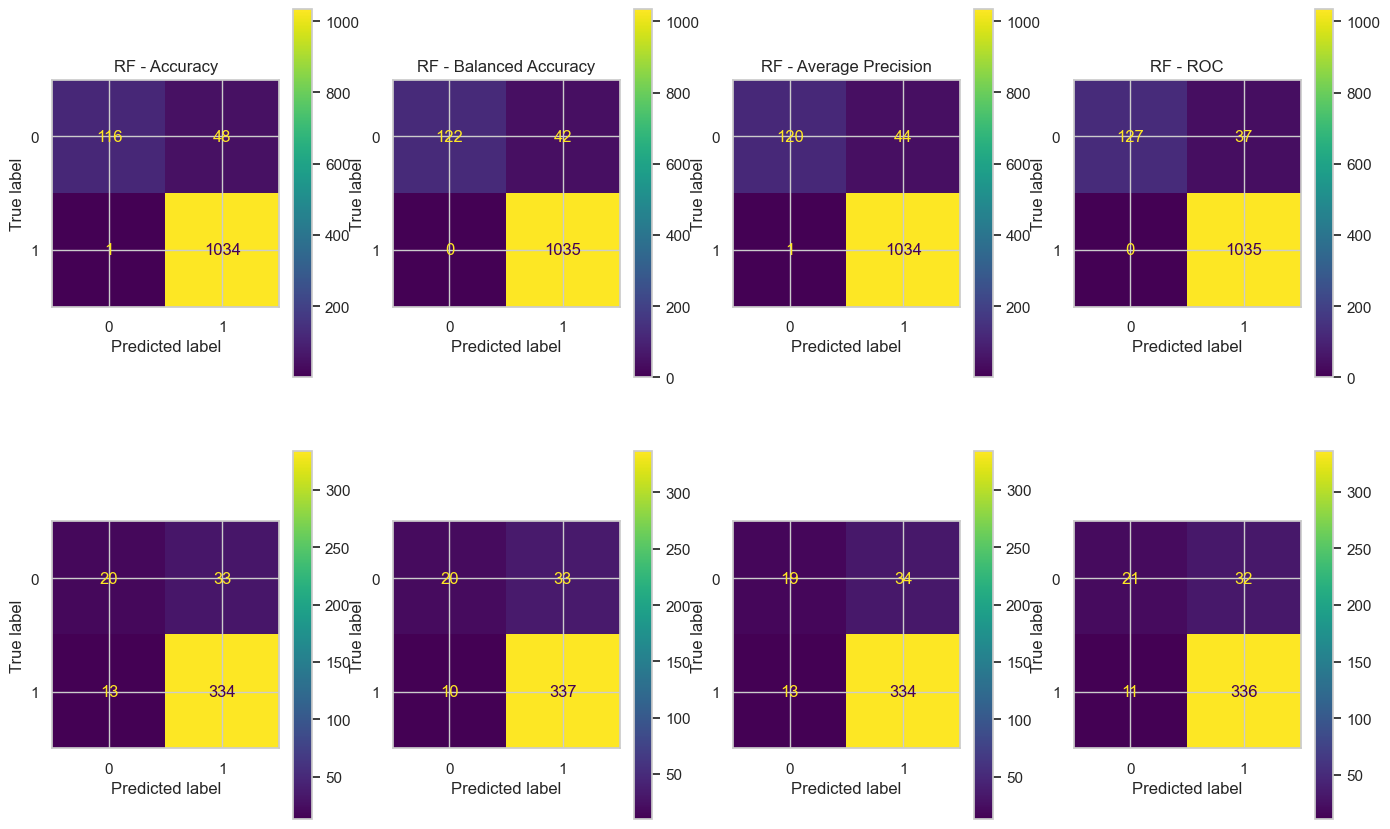

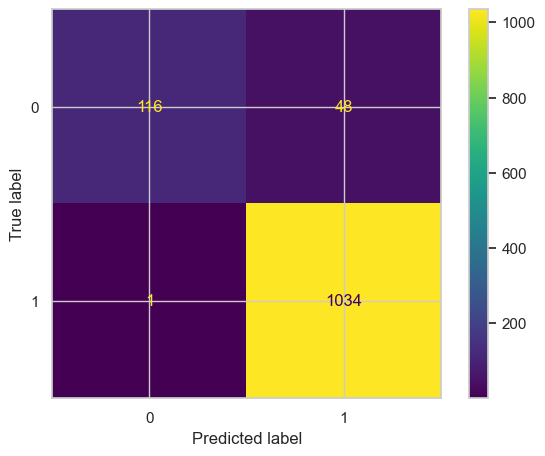

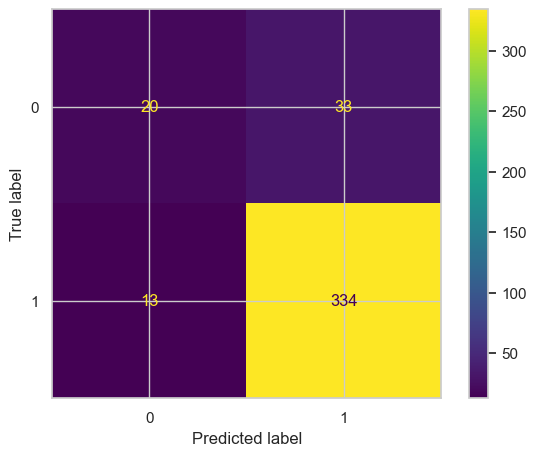

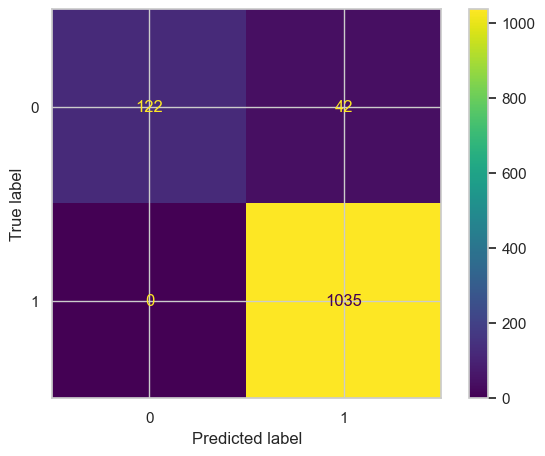

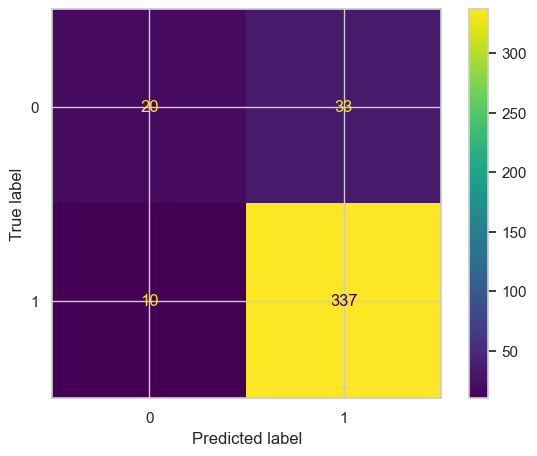

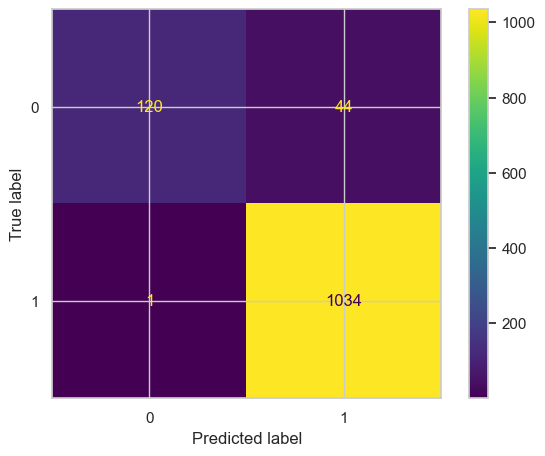

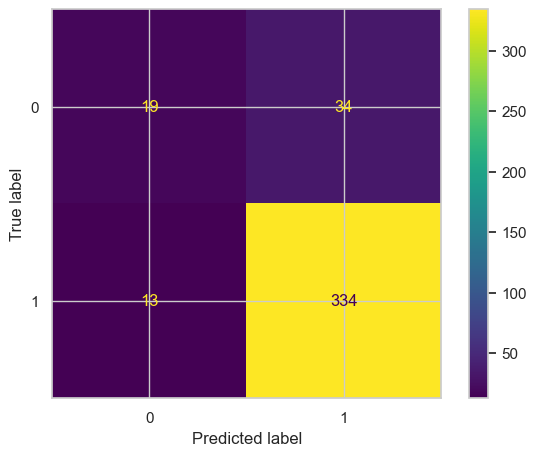

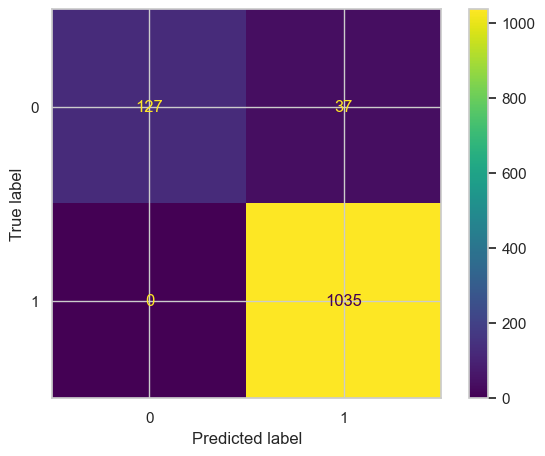

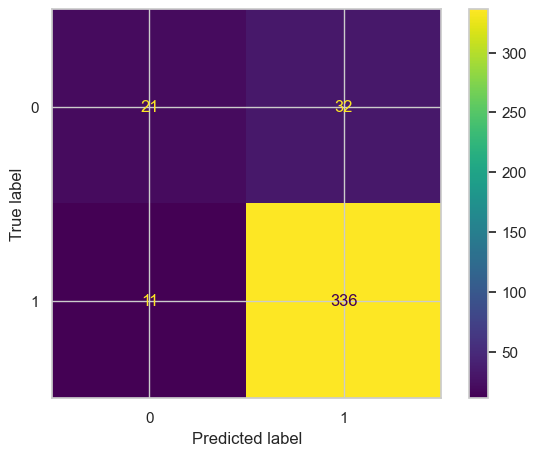

In [72]:
#Fazer plotar apenas o subplot, não os individuais.

fig,axs = plt.subplots(nrows = 2, ncols = 4, figsize = (15,10))

axs[0,0].set_title("RF - Accuracy")
axs[0,1].set_title("RF - Balanced Accuracy")
axs[0,2].set_title("RF - Average Precision")
axs[0,3].set_title("RF - ROC")

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_acc_treino).plot(ax = axs[0,0])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_acc).plot(ax = axs[1,0])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_bacc_treino).plot(ax = axs[0,1])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_bacc).plot(ax = axs[1,1])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_avp_treino).plot(ax = axs[0,2])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_avp).plot(ax = axs[1,2])

ConfusionMatrixDisplay.from_predictions(y_treino, previsoes_rf_roc_treino).plot(ax = axs[0,3])
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes_rf_roc).plot(ax = axs[1,3])
plt.show()

## Curva R.O.C


In [97]:
def roc_plot(y_test, y_predict, roc_auc, titulo):

  
    fpr, tpr, thr = roc_curve(y_test, y_predict)

    roc_display = RocCurveDisplay(fpr = fpr, tpr= tpr, roc_auc = roc_auc).plot()

    plt.title(titulo)
    plt.plot([0,1],[0,1],'g')

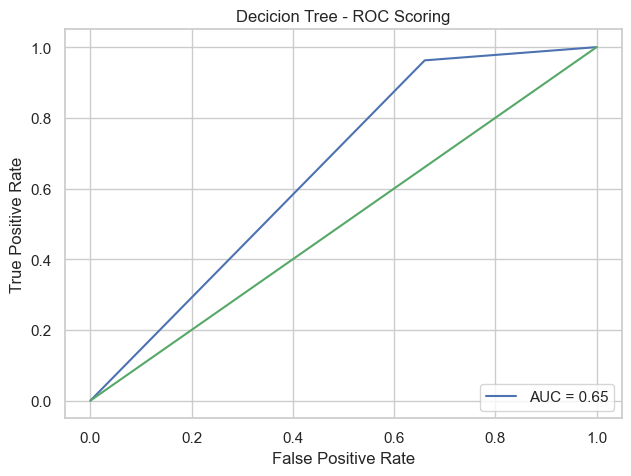

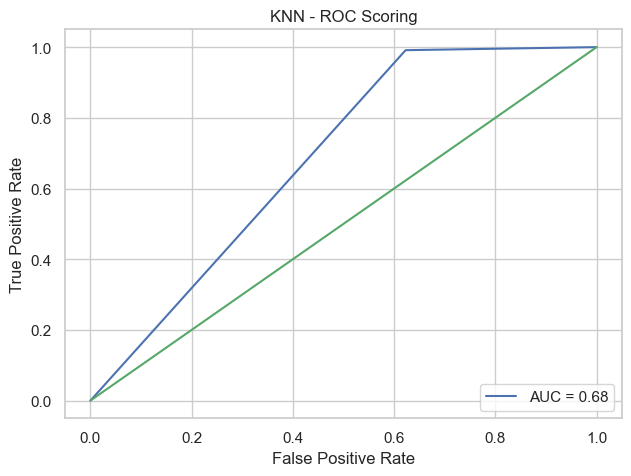

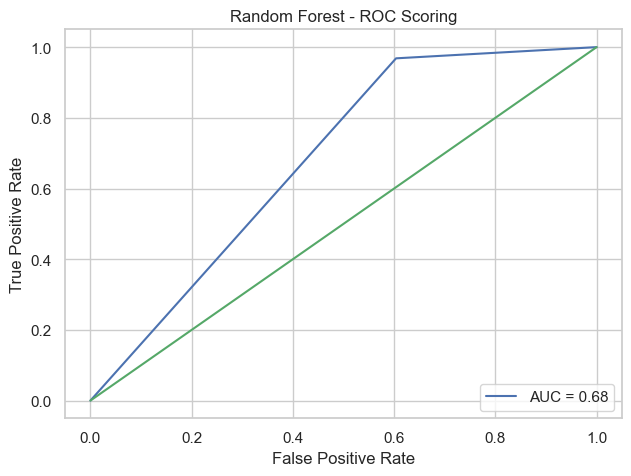

In [100]:



roc_plot(y_teste, previsoes_dt_roc, roc_auc_score(y_teste, previsoes_dt_roc), 'Decicion Tree - ROC Scoring')

roc_plot(y_teste, previsoes_roc, roc_auc_score(y_teste, previsoes_roc), 'KNN - ROC Scoring')

roc_plot(y_teste, previsoes_rf_roc, roc_auc_score(y_teste, previsoes_rf_roc), 'Random Forest - ROC Scoring')



